<a href="https://colab.research.google.com/github/Kabixr/Spotify/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trying encoding: utf-8
Failed with encoding utf-8: 'utf-8' codec can't decode byte 0x85 in position 5: invalid start byte
Trying encoding: latin-1

Loaded Spotify dataset successfully!
Shape: (90, 10)
Columns: ['title', 'artist', 'top genre', 'bpm', 'energy', 'danceability', 'liveness', 'valence', 'acousticness', 'speechiness']
                title                        artist top genre  bpm  energy  \
0     Highway to Hell                         AC/DC      rock  116      91   
1       Back In Black                         AC/DC      rock  188      70   
2       Thunderstruck                         AC/DC      rock  134      89   
3  Sweet Home Alabama                Lynyrd Skynyrd      rock   98      61   
4       Fortunate Son  Creedence Clearwater Revival      rock  133      66   

   danceability  liveness  valence  acousticness  speechiness  
0            57        16       42             6           13  
1            31         8       76             1            5  
2        

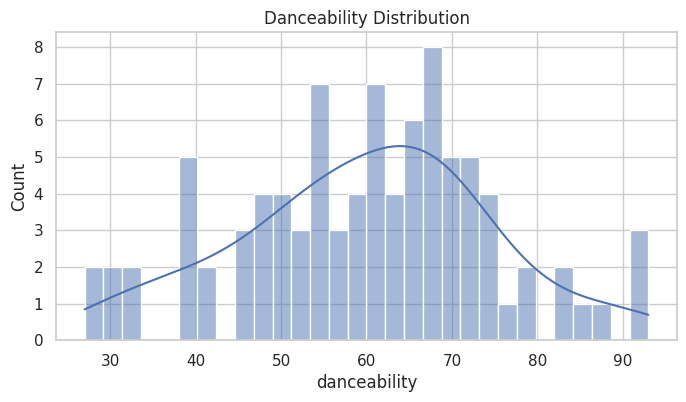

Saved: spotify_plots/energy_distribution.png


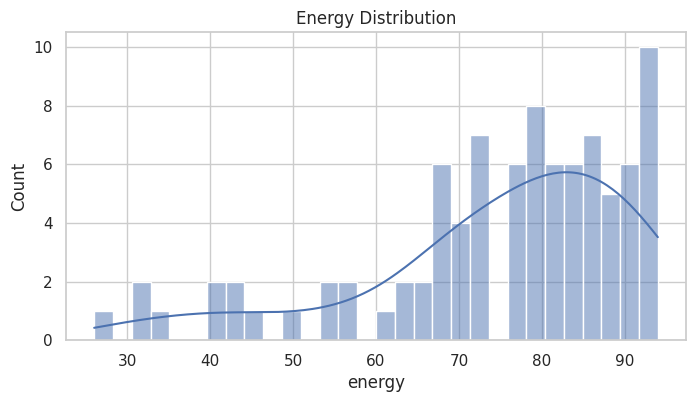

Saved: spotify_plots/valence_distribution.png


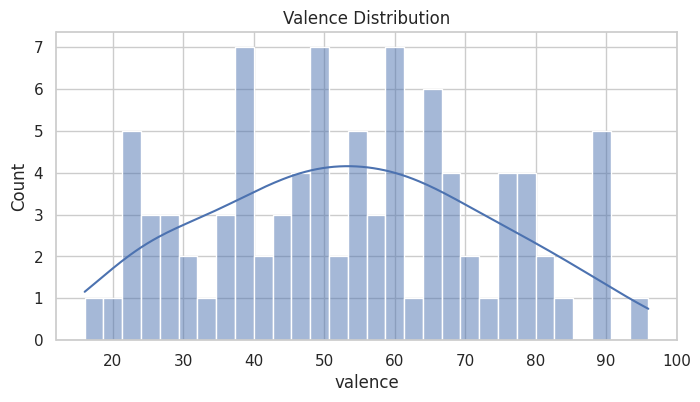

Saved: spotify_plots/audio_feature_corr.png


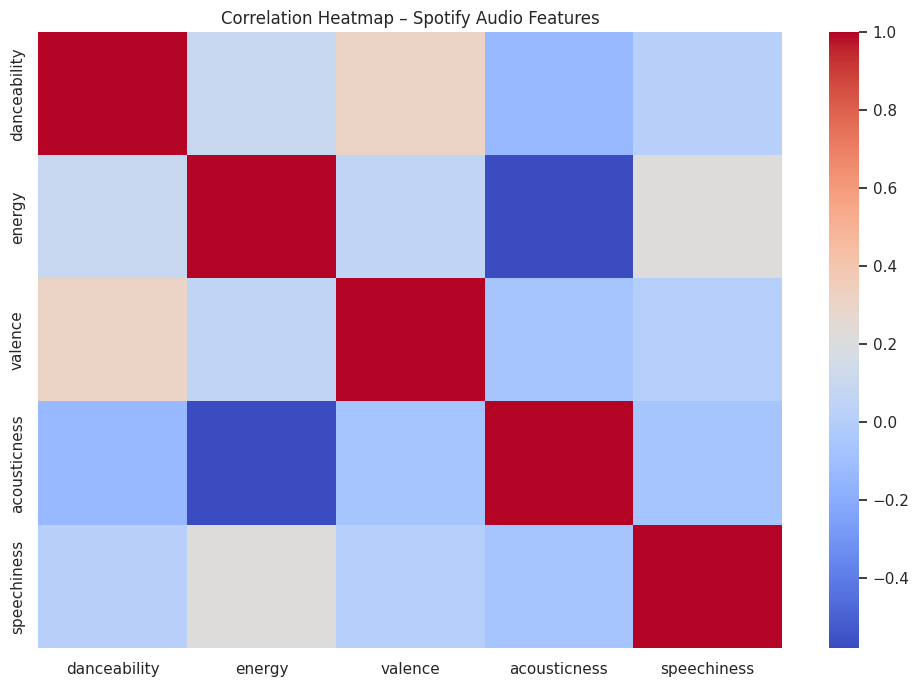

Saved: spotify_plots/danceability_vs_energy.png


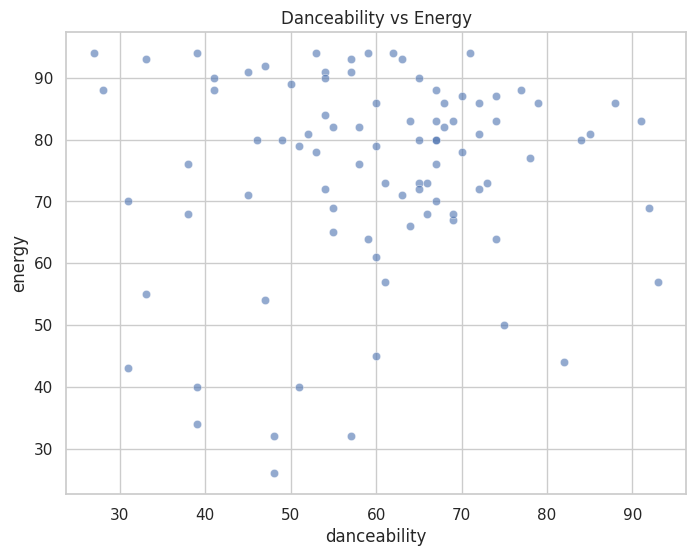

Saved: spotify_plots/valence_vs_energy.png


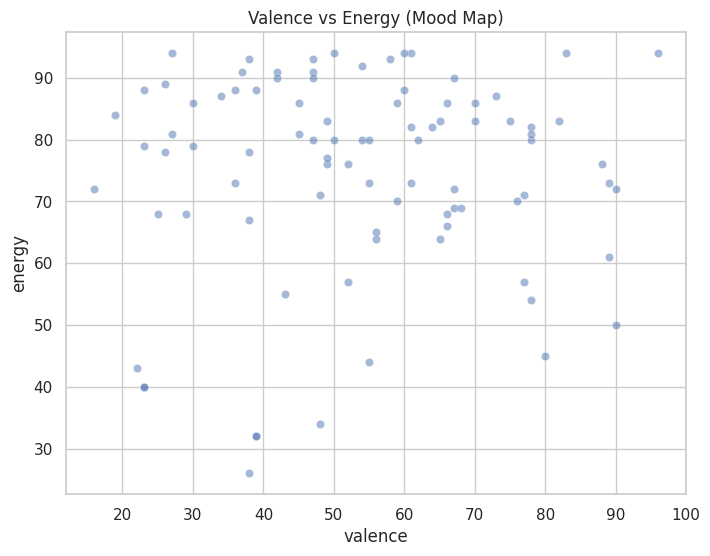

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All Spotify plots downloaded successfully!


In [2]:
# ====================== SPOTIFY AUDIO FEATURES ANALYSIS (FIXED ONE CELL) ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from google.colab import files

sns.set(style="whitegrid")

# 1. AUTO-IMPORT SPOTIFY DATASET WITH ENCODING FIX
spotify_url = "https://raw.githubusercontent.com/dylanwalker/BA865/master/datasets/spotify.csv"

def load_with_fallback(url):
    encodings = ["utf-8", "latin-1", "ISO-8859-1", "cp1252"]
    for enc in encodings:
        try:
            print(f"Trying encoding: {enc}")
            return pd.read_csv(url, encoding=enc)
        except Exception as e:
            print(f"Failed with encoding {enc}: {e}")
    raise ValueError("Could not load file with any encoding.")

df = load_with_fallback(spotify_url)

print("\nLoaded Spotify dataset successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# 2. CREATE FOLDER FOR PLOTS
plots_dir = "spotify_plots"
os.makedirs(plots_dir, exist_ok=True)

def save_plot(name):
    path = f"{plots_dir}/{name}.png"
    plt.savefig(path, dpi=200, bbox_inches="tight")
    print("Saved:", path)

# 3. SELECT USEFUL NUMERIC FEATURES
candidate_features = ["danceability", "energy", "valence", "tempo", "loudness",
                      "acousticness", "instrumentalness", "speechiness", "popularity", "duration_ms"]

available_features = [c for c in candidate_features if c in df.columns]
numeric_df = df[available_features].select_dtypes(include=[np.number])

print("\nUsing numeric audio features:", numeric_df.columns.tolist())

# 4. DISTRIBUTIONS
for feature in ["danceability", "energy", "valence", "tempo", "popularity"]:
    if feature in numeric_df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(numeric_df[feature], kde=True, bins=30)
        plt.title(f"{feature.capitalize()} Distribution")
        save_plot(f"{feature}_distribution")
        plt.show()

# 5. CORRELATION HEATMAP
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – Spotify Audio Features")
save_plot("audio_feature_corr")
plt.show()

# 6. DANCEABILITY vs ENERGY (if both exist)
if "danceability" in df.columns and "energy" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df,
        x="danceability",
        y="energy",
        alpha=0.6,
        hue=df["popularity"] if "popularity" in df.columns else None
    )
    plt.title("Danceability vs Energy")
    save_plot("danceability_vs_energy")
    plt.show()

# 7. VALENCE vs ENERGY (Mood Map)
if "valence" in df.columns and "energy" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="valence", y="energy", alpha=0.5)
    plt.title("Valence vs Energy (Mood Map)")
    save_plot("valence_vs_energy")
    plt.show()

# 8. DOWNLOAD ALL PLOTS
print("\nDownloading all Spotify plots...")
for f in glob.glob(f"{plots_dir}/*.png"):
    files.download(f)

print("All Spotify plots downloaded successfully!")
# =====================================================================
